## Atmospheres and longitudianl development

We look at the functions in MCEq to handle different atmospheres.

Follow explanation about how atmospheres are implmented. User defined atmospheres require to derive from EarthsAtmosphere class, and, an implmenetation for the `get_density(altitude in cm)` method - that's it. 

Exercises:
    
    1) Initialize an atmospheric model stand alone, plot it's density as a function of h and X
    2) Learn how to change atmosphere in MCEq 

In [1]:
#usual imports and jupyter setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np

# Path to MCEq. Can be uncommented if in PYTHONPATH
import sys
sys.path.append('../MCEq/')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

In [3]:
import MCEq.density_profiles as atms

In [10]:
# US Standard atmosphere
us = atms.CorsikaAtmosphere('BK_USStd', None)
isothermal = atms.IsothermalAtmosphere(None,None)
spw = atms.CorsikaAtmosphere('PL_SouthPole', 'August')
mspw = atms.MSIS00Atmosphere('SouthPole', 'August')

CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 30.0 degrees.
.. took 0.03s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 30.0 degrees.
.. took 0.02s
IsothermalAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 30.0 degrees.
.. took 0.03s
MSIS00Atmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 30.0 degrees.
.. took 0.08s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 80.0 degrees.
.. took 0.03s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 80.0 degrees.
.. took 0.02s
IsothermalAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 80.0 degrees.
.. took 0.03s
MSIS00Atmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 80.0 degrees.
.. took 0.08s


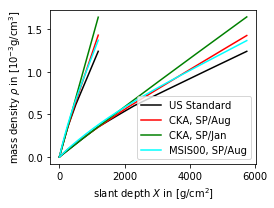

In [23]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
# set_theta will trigger integration and cache look-up

shower_angle = 30.

us_obj.set_theta(shower_angle)
spw_obj.set_theta(shower_angle)
isothermal.set_theta(shower_angle)
mspw_obj.set_theta(shower_angle)

# obtain the depth value corresponding to the surface from obj.X_surf 
x_vec = np.linspace(0, us_obj.max_X, 10000) 
plt.plot(x_vec, 1e3 / us_obj.r_X2rho(x_vec),label='US Standard',lw=1.5,color='black')
plt.plot(x_vec, 1e3 / spw_obj.r_X2rho(x_vec),label='CKA, SP/Aug',lw=1.5,color='red')
plt.plot(x_vec, 1e3 / isothermal.r_X2rho(x_vec),label='CKA, SP/Jan',lw=1.5,color='green')
plt.plot(x_vec, 1e3 / mspw_obj.r_X2rho(x_vec),label='MSIS00, SP/Aug',lw=1.5,color='cyan')

shower_angle = 80.

us_obj.set_theta(shower_angle)
spw_obj.set_theta(shower_angle)
isothermal.set_theta(shower_angle)
mspw_obj.set_theta(shower_angle)

# obtain the depth value corresponding to the surface from obj.X_surf 
x_vec = np.linspace(0, us_obj.max_X, 10000) 
plt.plot(x_vec, 1e3 / us_obj.r_X2rho(x_vec),lw=1.5,color='black')
plt.plot(x_vec, 1e3 / spw_obj.r_X2rho(x_vec),lw=1.5,color='red')
plt.plot(x_vec, 1e3 / isothermal.r_X2rho(x_vec),lw=1.5,color='green')
plt.plot(x_vec, 1e3 / mspw_obj.r_X2rho(x_vec),lw=1.5,color='cyan')

plt.legend()
plt.xlabel('slant depth $X$ in [g/cm$^2$]')
plt.ylabel(r'mass density $\rho$ in [10$^{-3}$g/cm$^3$]')
plt.tight_layout()


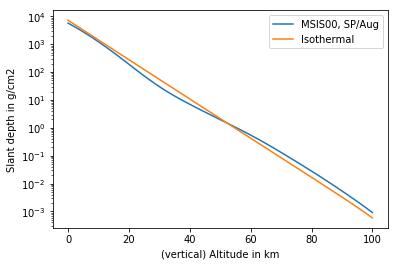

In [48]:
altitudes = np.linspace(0,100e5) #has to be in cm
plt.semilogy(altitudes/1e5,mspw_obj.h2X(heights),label='MSIS00, SP/Aug')
plt.semilogy(altitudes/1e5,isothermal.h2X(heights),label='Isothermal')
plt.xlabel('(vertical) Altitude in km')
plt.ylabel('Slant depth in g/cm2')
plt.legend()

In [33]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3c',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model=(pm.Thunman,None), #(pm.HillasGaisser2012, 'H3a'),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
#expand the rest of the options from mceq_config.py
**config
)

InteractionYields::_load(): Looking for /mnt/c/Users/afedy/OneDrive/devel/git/MCEq/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /mnt/c/Users/afedy/OneDrive/devel/git/MCEq/data/compact_decay_tables.ppd

Hadrons and stable particles:

"p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "gamma", "antinutau", "antinumu", "antinue", 
"e+", "mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEqRun::set_interaction_model():  SIBY

In [75]:
# Let's plot the evolution of muon fluxes as a function of altitude
altitudes = np.linspace(0,30e5, 100)
#Slightly inclined shower at 30 degrees
mceq_run.set_theta_deg(30.)

MCEqRun::set_theta_deg():  30.0
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 30.0 degrees.
.. took 0.03s


# Warning: the dependence between altitude h and depth X depends on the density profile and thus the currently selected model

In [76]:
# Convert altitudes to depths X_i in g/cm2
mceq_run.set_density_model(('CORSIKA', ('PL_SouthPole', 'August')))
depths = mceq_run.density_model.h2X(altitudes)[::-1]

MCEqRun::set_density_model():  CORSIKA ('PL_SouthPole', 'August')
MCEqRun::set_theta_deg():  0.0
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 0.0 degrees.
.. took 0.03s


In [77]:
mceq_run.solve(int_grid=depths)

MCEqRun::_calculate_integration_path(): X_surface = 1019.97649469
MCEqRun::_calculate_integration_path() using decays as leading eigenvalues
MCEqRun::_forward_euler(): Solver will perform 477 integration steps.
Performance:   0.90ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 0.429239034653 sec


Obtain longitudinal evolution of the number of muons each depth X, by integrating spectrum at each grid point

In [78]:
# Now for each altitude bin, integrate spectrum to get muon number
mu_numbers = []
for i in range(len(altitudes)):
    # integrate multiplies the discrete spectrum by bin widths dN/dE * dE
    mu_spec = (mceq_run.get_solution('total_mu+', mag=0, grid_idx=i, integrate=True) 
                + mceq_run.get_solution('total_mu-', mag=0, grid_idx=i,integrate=True))

    mu_numbers.append(np.sum(mu_spec)) # obtained by simple sum (midpoint integral)

#reverse list, since depths supplied in different order
mu_numbers.reverse()

Text(0,0.5,'$dN_\\mu/dh$ (1/cm)')

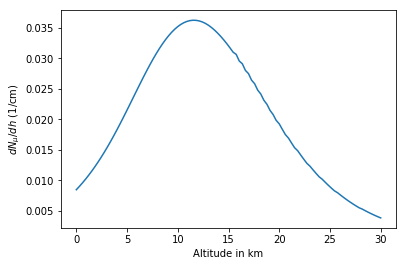

In [80]:
plt.plot(altitudes/1e5,mu_numbers)
plt.xlabel('Altitude in km')
plt.ylabel('$dN_\mu/dh$ (1/cm)')

In [61]:
mu_numbers

[0.008452411411908091,
 0.009439107967396741,
 0.010555974745491751,
 0.011802528744702537,
 0.013154178859459083,
 0.014526339317085026,
 0.015532694318653752,
 0.014344044538029132,
 0.0028898521744242303,
 -0.054608440894374374,
 -0.3171649469144884,
 -1.471224995259129,
 -6.560846658190432,
 -29.08201578361083,
 -129.0878597208618,
 -574.507363664653,
 -2563.2498548358662,
 -11460.263727559337,
 -51325.777174041265,
 -230181.5068849222,
 -1033435.5335452023,
 -4643883.542835229,
 -20882833.587036174,
 -93960978.95485878,
 -422967641.76220816,
 -1904711254.6071534,
 -8579895126.220578,
 -38658068712.48241,
 -174214014936.68408,
 -785225073846.9237,
 -3539646707292.0957,
 -15957669933177.506,
 -71947217924722.17,
 -324404071667122.06,
 -1462784804324359.5,
 -6596165283466522.0,
 -2.974509913757787e+16,
 -1.3413697970188531e+17,
 -6.049056074987644e+17,
 -2.727907508380347e+18,
 -1.2301882734120569e+19,
 -5.547664944484874e+19,
 -2.5017387902856315e+20,
 -1.1281388686845515e+21,
 -5.0